# Importing the dependencies


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

# Describing the data 

In [ ]:
df=pd.read_csv('/content/AIR_data.csv',encoding='unicode_escape')
# Reading the dataset

In [ ]:
df.head()
# Loading the dataset

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [ ]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(80127, 13)

In [ ]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80127 entries, 0 to 80126
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   stn_code                     52376 non-null  float64
 1   sampling_date                80127 non-null  object 
 2   state                        80126 non-null  object 
 3   location                     80126 non-null  object 
 4   agency                       51133 non-null  object 
 5   type                         78932 non-null  object 
 6   so2                          72720 non-null  float64
 7   no2                          77122 non-null  float64
 8   rspm                         73566 non-null  float64
 9   spm                          38085 non-null  float64
 10  location_monitoring_station  75076 non-null  object 
 11  pm2_5                        1356 non-null   float64
 12  date                         80126 non-null  object 
dtypes: float64(6), o

In [ ]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

stn_code                       27751
sampling_date                      0
state                              1
location                           1
agency                         28994
type                            1195
so2                             7407
no2                             3005
rspm                            6561
spm                            42042
location_monitoring_station     5051
pm2_5                          78771
date                               1
dtype: int64

In [ ]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,stn_code,so2,no2,rspm,spm,pm2_5
count,52376.000000,72720.000000,77122.000000,73566.000000,38085.000000,1356.000000
mean,411.963705,7.937499,22.995159,99.028593,216.491791,40.579867
std,212.658814,7.004708,17.200809,68.555600,144.645187,42.396927
min,36.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,233.000000,4.200000,13.000000,57.000000,124.000000,15.000000
50%,464.000000,6.000000,17.700000,82.000000,189.000000,24.000000
75%,584.000000,9.300000,28.100000,118.000000,276.000000,44.000000
max,788.000000,228.000000,334.900000,892.000000,1885.000000,318.000000


In [ ]:
df.nunique()
# These are all the unique values present in the dataframe

stn_code                        142
sampling_date                  4917
state                            10
location                         76
agency                           14
type                              8
so2                             712
no2                            1190
rspm                           1171
spm                            1967
location_monitoring_station     196
pm2_5                           242
date                           4772
dtype: int64

In [ ]:
df.columns
# These are all the columns present in the dataset.

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

# Data Visualization

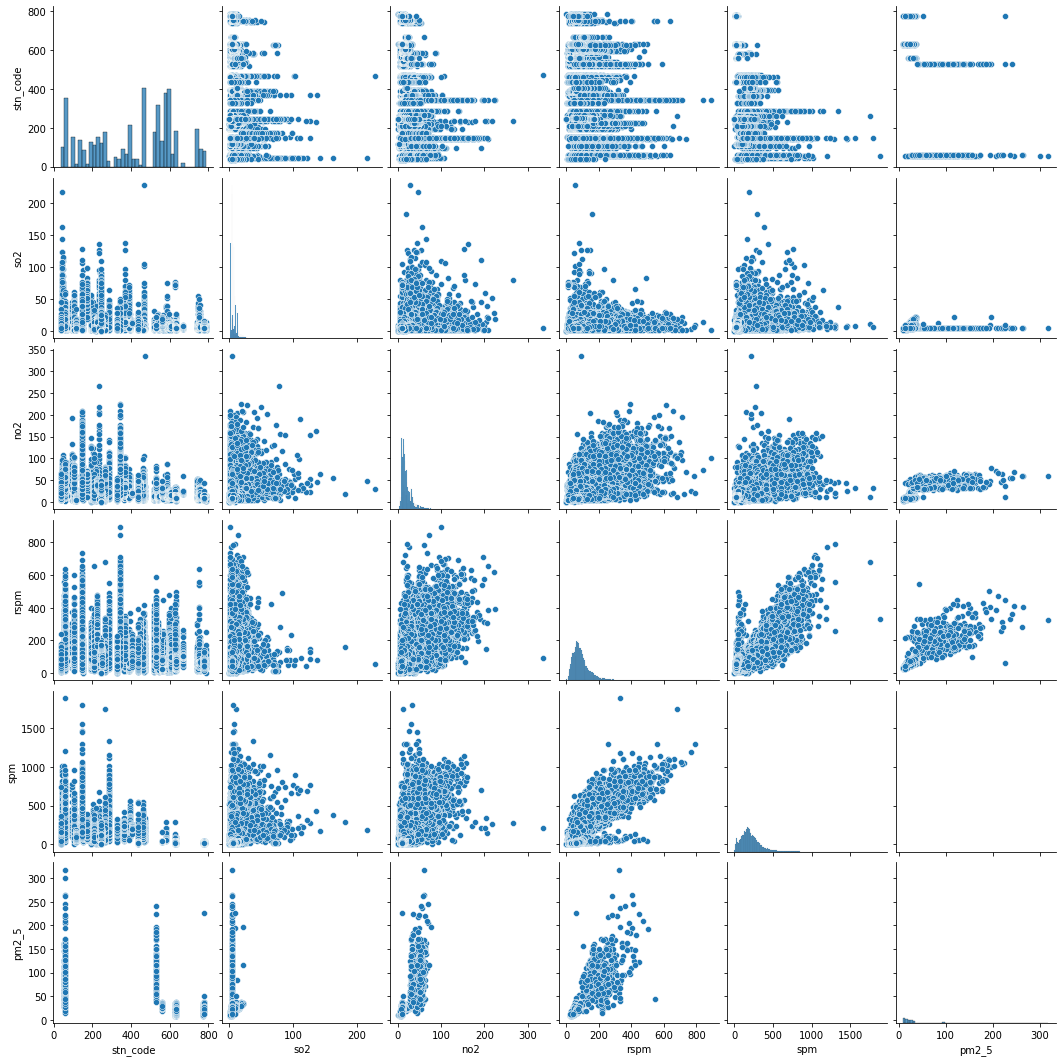

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['state'].value_counts()
# Viewing the count of values present in the state column

Andhra Pradesh          26368
Assam                   19361
Delhi                    8551
Chandigarh               8520
Chhattisgarh             7831
Goa                      5714
Bihar                    2275
Daman & Diu               782
Dadra & Nagar Haveli      634
Arunachal Pradesh          90
Name: state, dtype: int64

[]

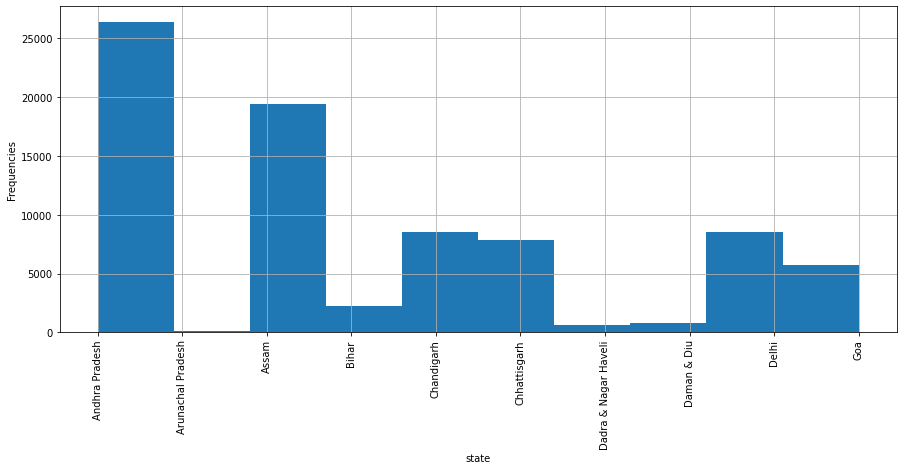

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [ ]:
df['type'].value_counts()
# Viewing the count of values present in the type column

Residential, Rural and other Areas    38180
Residential and others                20628
Industrial Area                       10867
Industrial Areas                       5841
Sensitive Area                         2083
Sensitive Areas                        1282
Industrial                               36
Residential                              15
Name: type, dtype: int64

[]

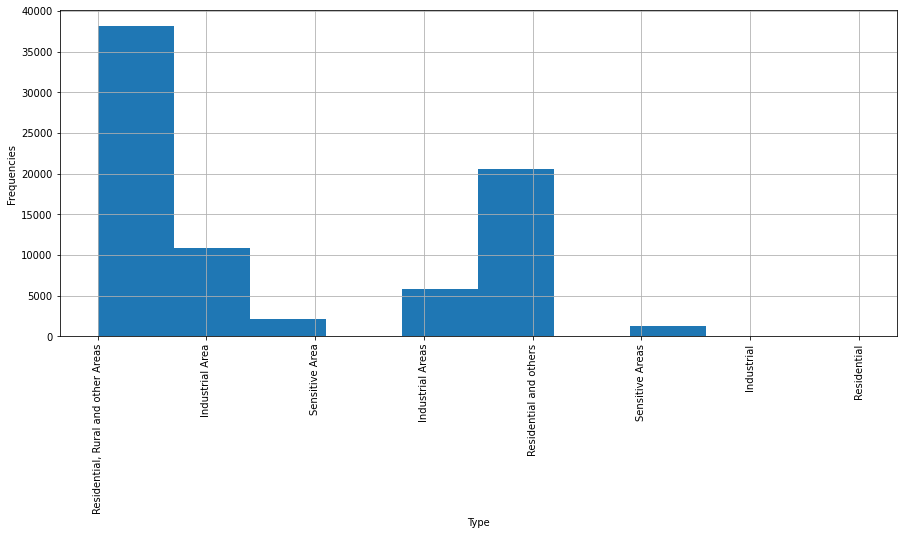

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset

In [ ]:
df['agency'].value_counts()
# Viewing the counts of values present in the agency column

Andhra Pradesh State Pollution Control Board                   15691
Assam State Pollution Control Board                            13427
Chandigarh Pollution Control Committee                          4614
Goa State Pollution Control Board                               4548
Chattisgarh Environment Conservation Board                      4051
Central Pollution Control Board                                 3604
National Environmental Engineering Research Institute           1973
Bihar Sate Pollution Control Board                               728
Bihar Pollution Control Board                                    686
Daman Diu, Dadra & Nagar Heveli Pollution Control Committee      636
Andhra Pradesh  Pollution Control Board                          610
ASPB                                                             245
Goa Pollution Control Board                                      230
Arunachal Pradesh State Pollution Control Board                   90
Name: agency, dtype: int64

[]

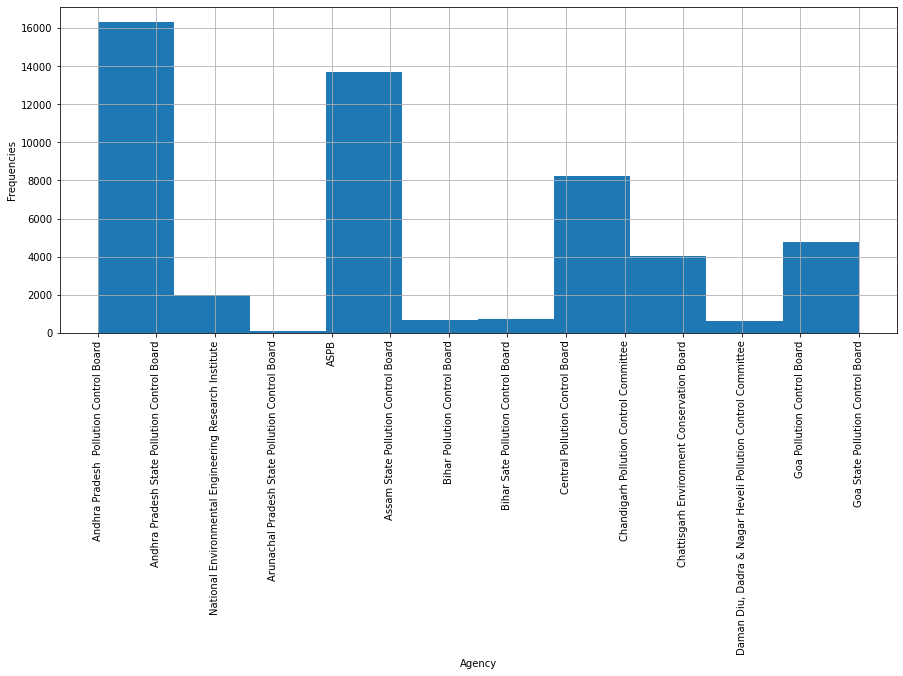

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Agency present in the dataset.

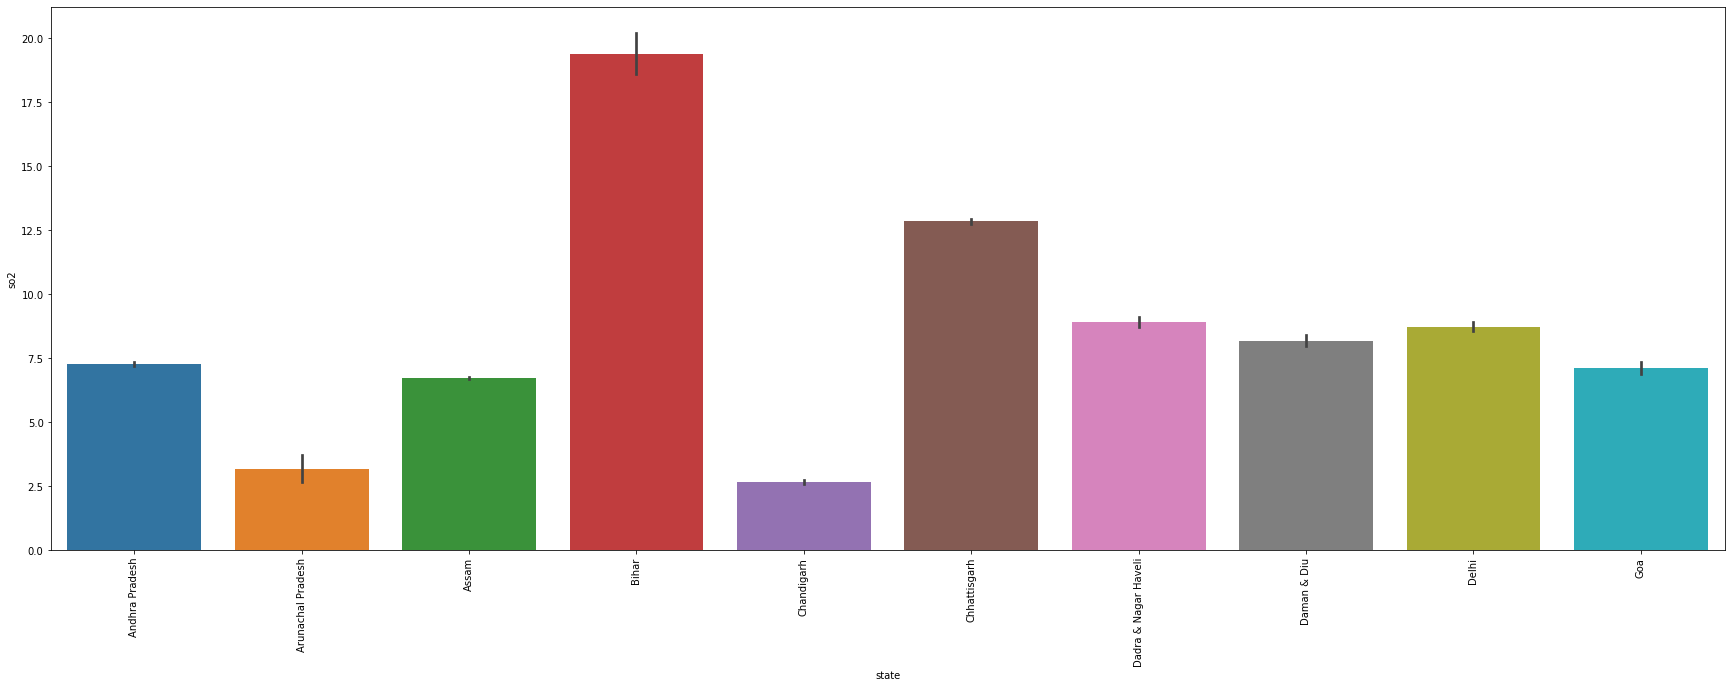

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [ ]:
plt.rcParams['figure.figsize']=(30,10)

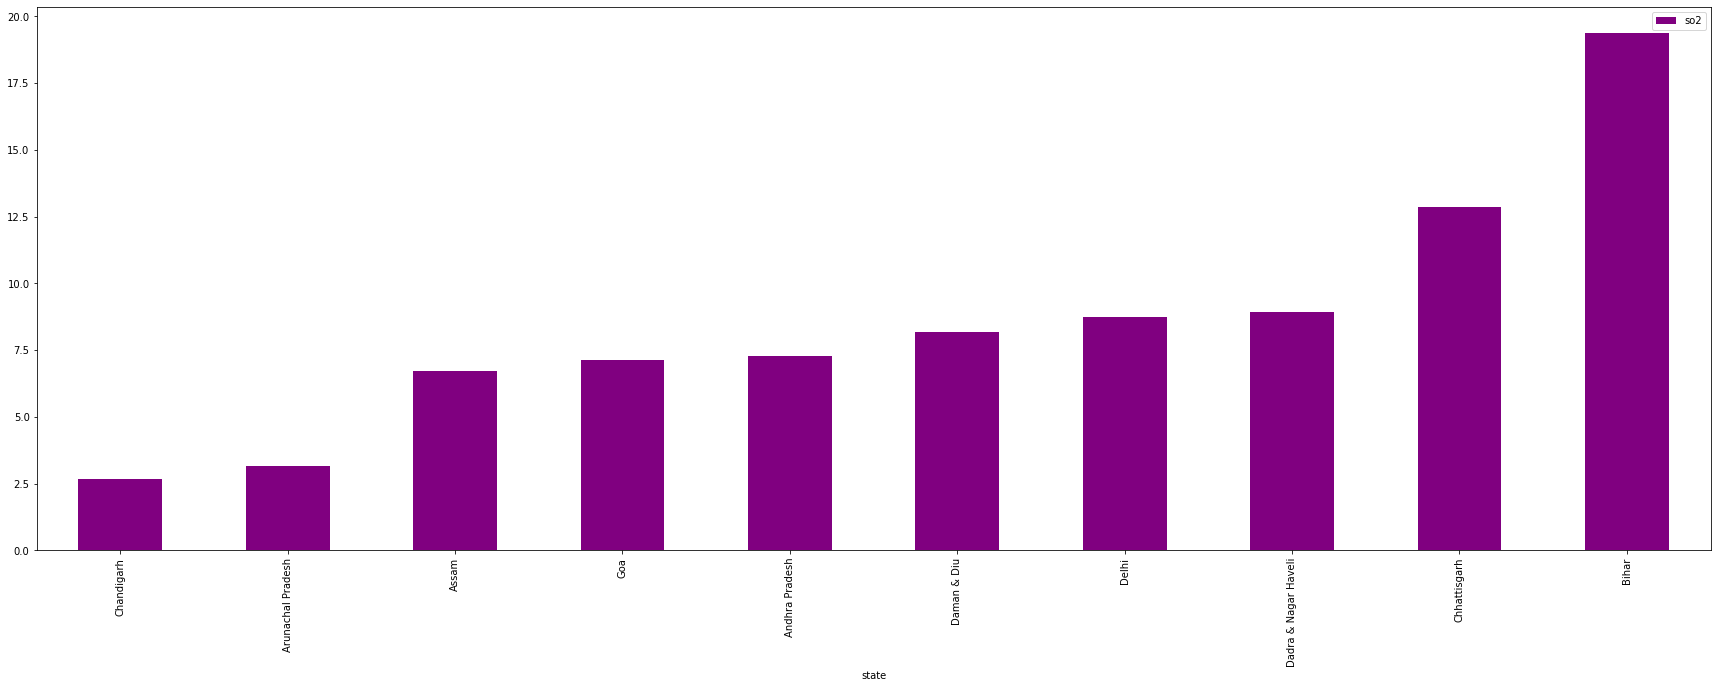

In [ ]:
df[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

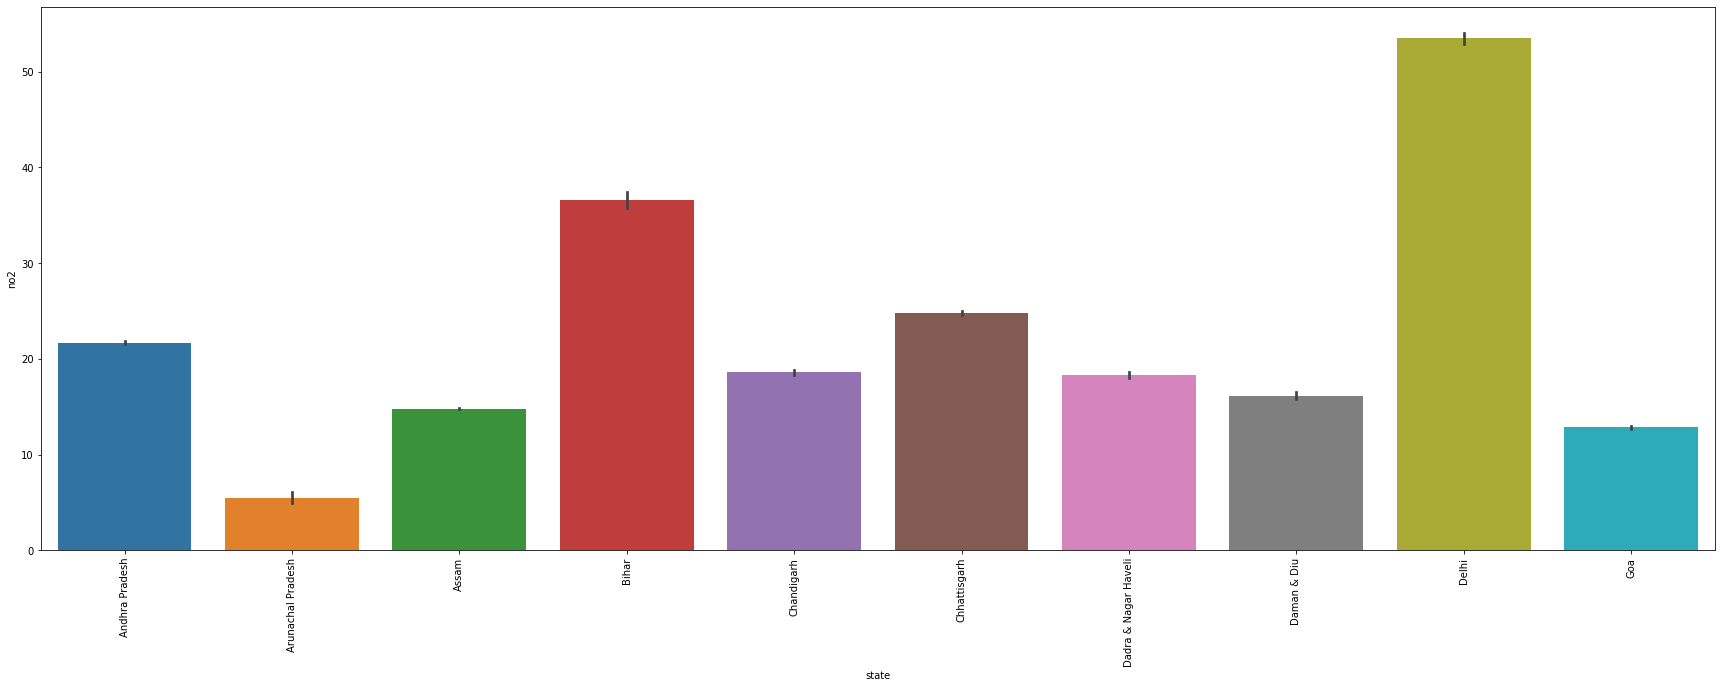

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df);
# West bengal has a higher no2 level compared to other states 

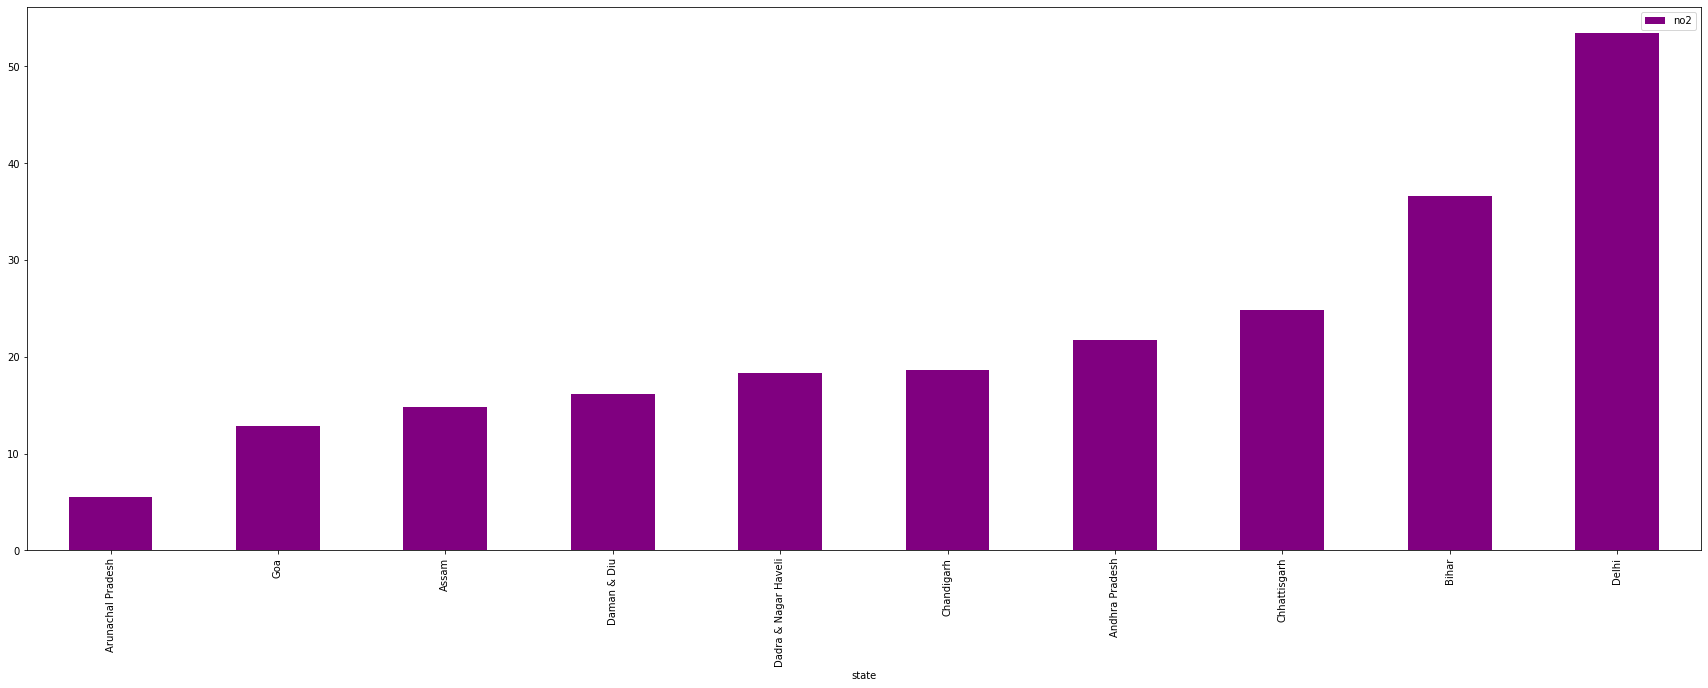

In [ ]:
df[['no2','state']].groupby(["state"]).mean().sort_values(by='no2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

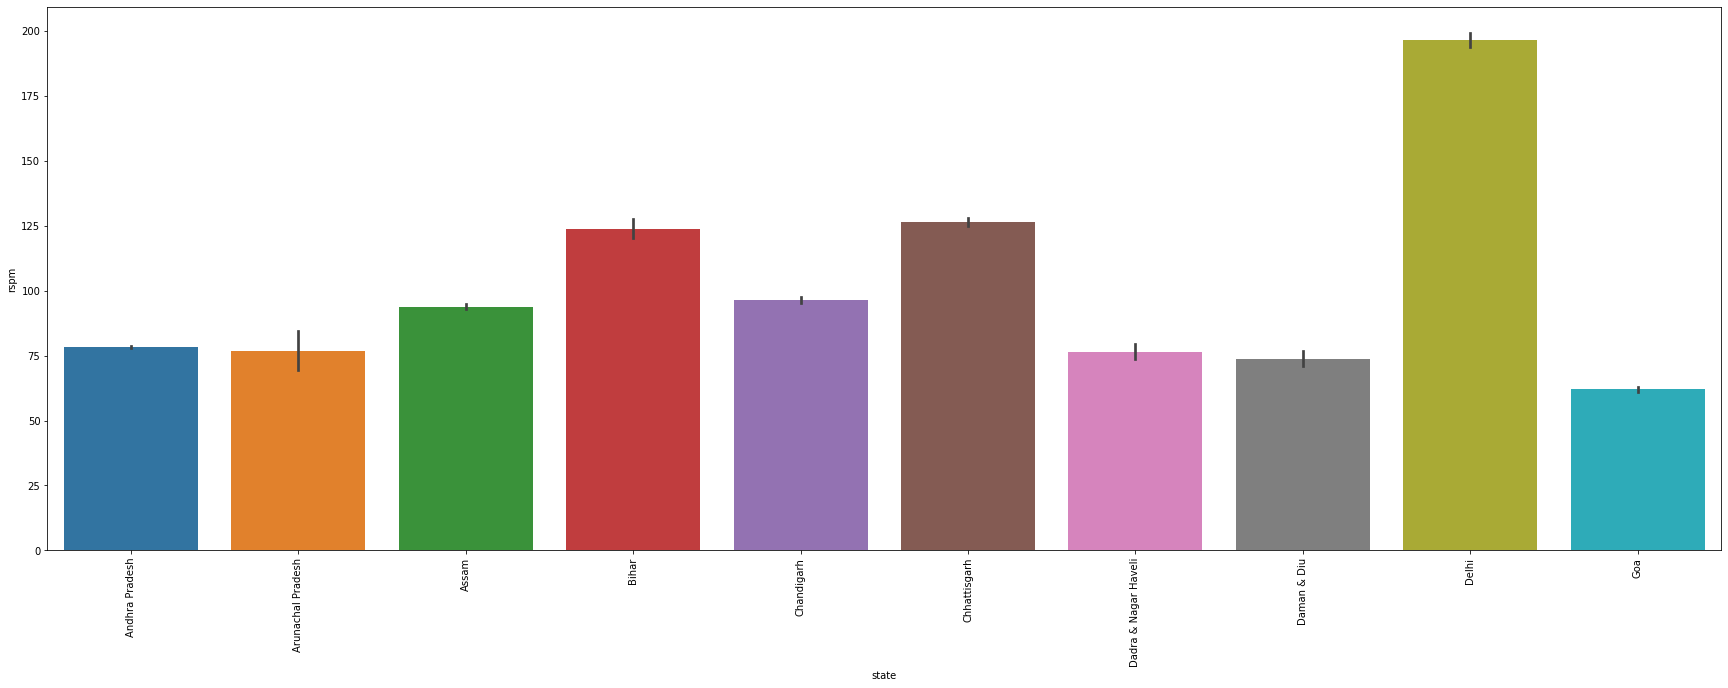

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df);
# Delhi has higher rspm level compared to other states

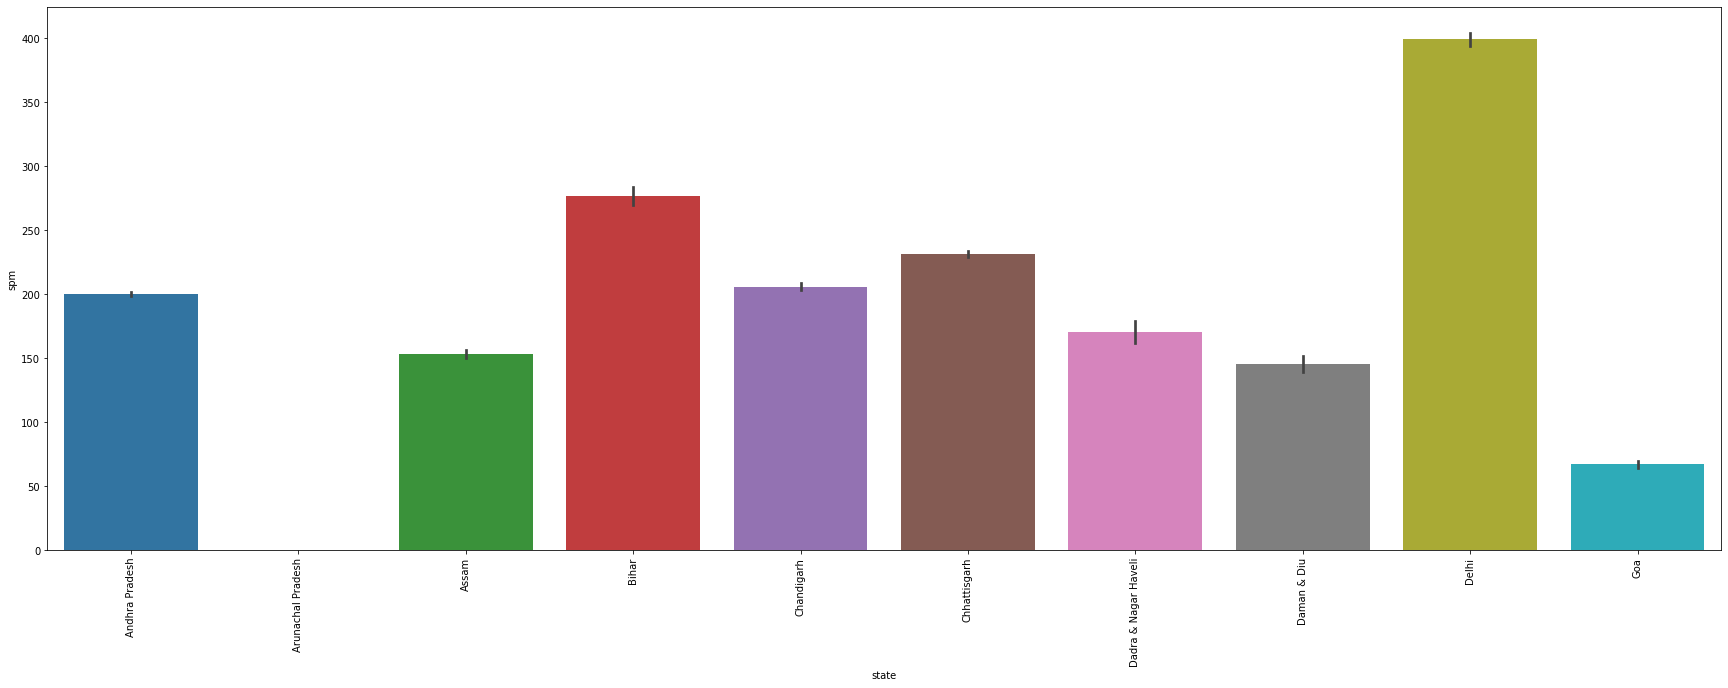

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df);
# Delhi has higher spm level compared to other states 

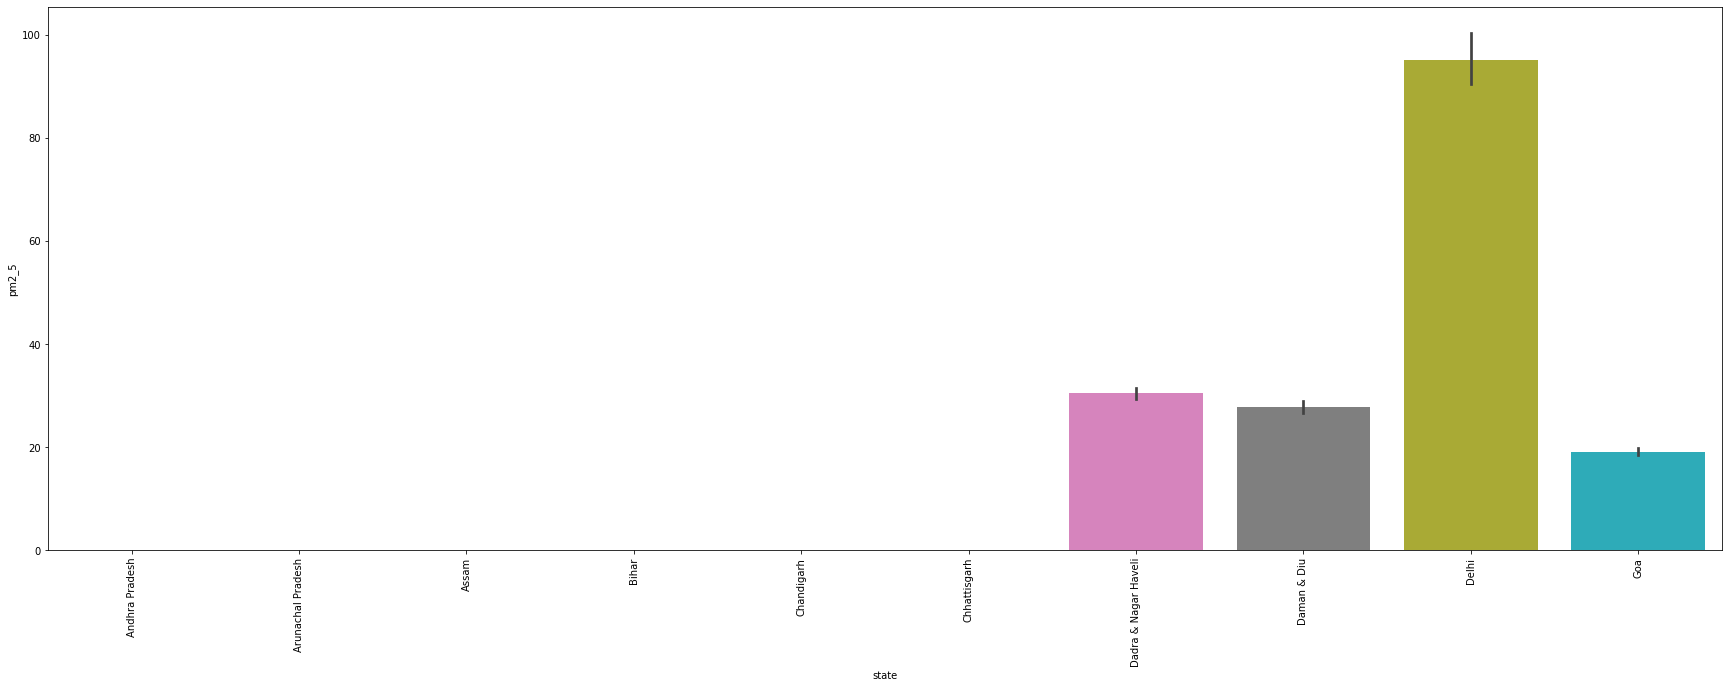

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='pm2_5',data=df);
# Delhi has higher pm2_5 level compared to other states 